# Código de Optimización para probelmas de Nodos


El algoritmo de Bellman-Ford es un algoritmo de programación dinámica que calcula el camino más corto desde un nodo de origen a todos los demás nodos en un grafo con pesos que pueden ser negativos. A continuación, se presenta el desarrollo matemático y la implementación en Python de forma iterativa.
Desarrollo Matemático del Algoritmo de Bellman-Ford
Inicialización:

Inicializa la distancia desde el nodo de origen a sí mismo como 0: 
1) Inicializa la distancia desde el nodo de origen a sí mismo como 0
2) nicializa las distancias desde el nodo de origen a todos los demás nodos como infinito

Relajación de Aristas:

1) Para cada nodo, relaja todas las aristas del grafo repetidamente
2) Arista (u,v)=dist(u) + peso(u,v) < dist(v) entonces actualiza dist(v)=dist(u) + peso(u,v)




# Código para modelo sin costes por nodos

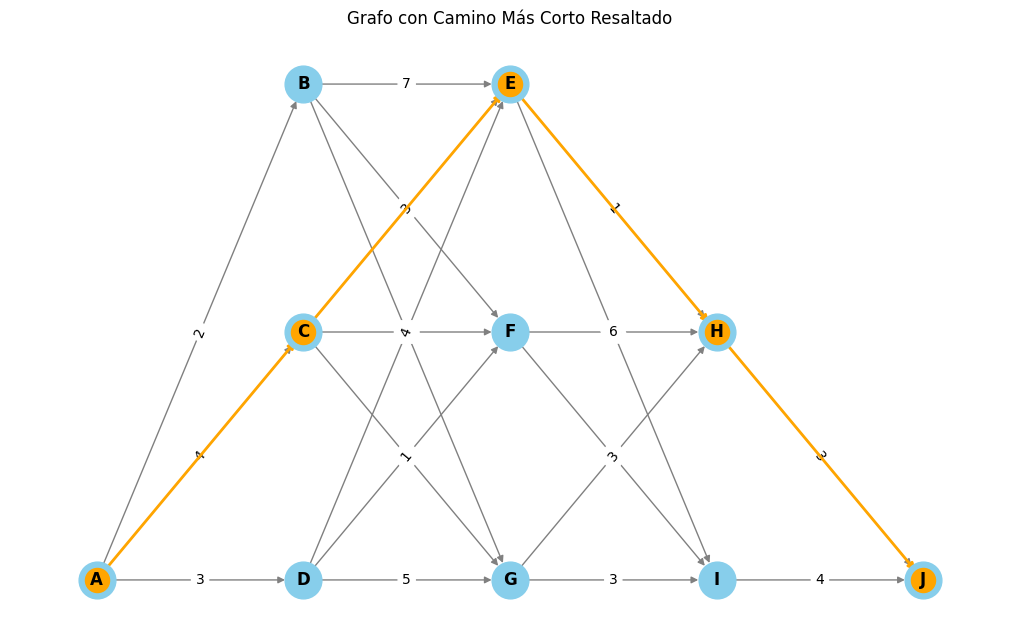

El camino más corto de A a J es ['A', 'C', 'E', 'H', 'J'] con un costo de 11
Hay 18 caminos posibles de A a J.
Todos los caminos posibles y sus costes:
Camino: ['A', 'B', 'E', 'H', 'J'] con un coste de 13
Camino: ['A', 'B', 'E', 'I', 'J'] con un coste de 17
Camino: ['A', 'B', 'F', 'H', 'J'] con un coste de 15
Camino: ['A', 'B', 'F', 'I', 'J'] con un coste de 13
Camino: ['A', 'B', 'G', 'H', 'J'] con un coste de 14
Camino: ['A', 'B', 'G', 'I', 'J'] con un coste de 15
Camino: ['A', 'C', 'E', 'H', 'J'] con un coste de 11
Camino: ['A', 'C', 'E', 'I', 'J'] con un coste de 15
Camino: ['A', 'C', 'F', 'H', 'J'] con un coste de 15
Camino: ['A', 'C', 'F', 'I', 'J'] con un coste de 13
Camino: ['A', 'C', 'G', 'H', 'J'] con un coste de 14
Camino: ['A', 'C', 'G', 'I', 'J'] con un coste de 15
Camino: ['A', 'D', 'E', 'H', 'J'] con un coste de 11
Camino: ['A', 'D', 'E', 'I', 'J'] con un coste de 15
Camino: ['A', 'D', 'F', 'H', 'J'] con un coste de 13
Camino: ['A', 'D', 'F', 'I', 'J'] con un coste de 11


In [27]:
import networkx as nx
import matplotlib.pyplot as plt

# Definir los nodos y las aristas con sus pesos basados en la matriz proporcionada
edges = [
    ('A', 'B', 2), ('A', 'C', 4), ('A', 'D', 3),
    ('B', 'E', 7), ('B', 'F', 4), ('B', 'G', 6),
    ('C', 'E', 3), ('C', 'F', 2), ('C', 'G', 4),
    ('D', 'E', 4), ('D', 'F', 1), ('D', 'G', 5),
    ('E', 'H', 1), ('E', 'I', 4),
    ('F', 'H', 6), ('F', 'I', 3),
    ('G', 'H', 3), ('G', 'I', 3),
    ('H', 'J', 3),
    ('I', 'J', 4)
]

# Crear el grafo dirigido
G = nx.DiGraph()

# Añadir las aristas al grafo
G.add_weighted_edges_from(edges)

# Definir las posiciones de los nodos para que estén ordenados por columnas
pos = {
    'A': (0, 0), 'B': (1, 2), 'C': (1, 1), 'D': (1, 0),
    'E': (2, 2), 'F': (2, 1), 'G': (2, 0),
    'H': (3, 1), 'I': (3, 0),
    'J': (4, 0)
}

# Algoritmo de Bellman-Ford para encontrar el camino más corto
def shortest_path_bellman_ford(G, start, end):
    # Calcula la distancia más corta desde el nodo de inicio a todos los otros nodos
    distance, path = nx.single_source_bellman_ford(G, start)
    return path[end], distance[end]

# Encontrar todos los caminos simples entre dos nodos y calcular su coste
def find_all_paths_and_costs(G, start, end):
    paths = list(nx.all_simple_paths(G, start, end))
    paths_with_costs = []
    for path in paths:
        cost = sum(G[u][v]['weight'] for u, v in zip(path[:-1], path[1:]))
        paths_with_costs.append((path, cost))
    return paths_with_costs

# Dibujar el grafo
def draw_graph(G, pos, path):
    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=700, edge_color='gray', font_weight='bold')
    
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    
    # Resaltar el camino más corto
    path_edges = list(zip(path, path[1:]))
    nx.draw_networkx_nodes(G, pos, nodelist=path, node_color='orange')
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='orange', width=2)
    
    plt.title("Grafo con Camino Más Corto Resaltado")
    plt.show()

# Encontrar el camino más corto desde 'A' hasta 'J'
start_node = 'A'
end_node = 'J'
path, cost = shortest_path_bellman_ford(G, start_node, end_node)

# Dibujar el grafo y el camino más corto
draw_graph(G, pos, path)

print(f"El camino más corto de {start_node} a {end_node} es {path} con un costo de {cost}")

# Encontrar todos los caminos simples de 'A' a 'J' y calcular sus costes
all_paths_with_costs = find_all_paths_and_costs(G, start_node, end_node)

# Verificar si hay más de un camino
if len(all_paths_with_costs) > 1:
    print(f"Hay {len(all_paths_with_costs)} caminos posibles de {start_node} a {end_node}.")
else:
    print(f"Solo hay un camino posible de {start_node} a {end_node}.")

print("Todos los caminos posibles y sus costes:")
for p, c in all_paths_with_costs:
    print(f"Camino: {p} con un coste de {c}")


# Código teniendo en cuenta los costes unitarios

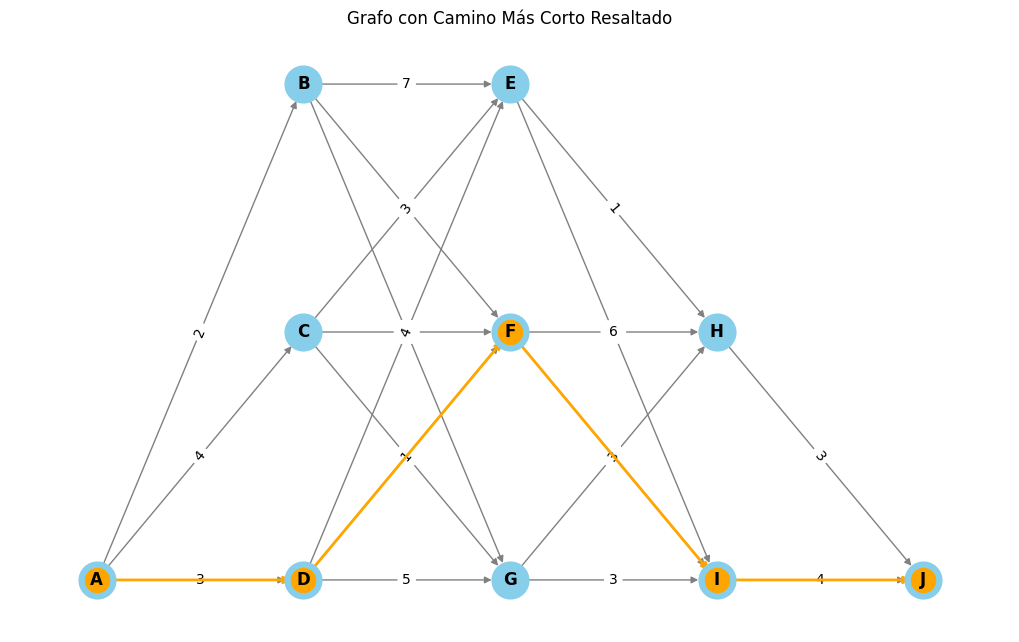

El camino más corto de A a J es ['A', 'D', 'F', 'I', 'J'] con un coste de 13.0
Hay 18 caminos posibles de A a J.
Todos los caminos posibles y sus costes:
Camino: ['A', 'B', 'E', 'H', 'J'] con un coste de 20
Camino: ['A', 'B', 'E', 'I', 'J'] con un coste de 26.0
Camino: ['A', 'B', 'F', 'H', 'J'] con un coste de 23
Camino: ['A', 'B', 'F', 'I', 'J'] con un coste de 22.5
Camino: ['A', 'B', 'G', 'H', 'J'] con un coste de 20
Camino: ['A', 'B', 'G', 'I', 'J'] con un coste de 22.5
Camino: ['A', 'C', 'E', 'H', 'J'] con un coste de 18
Camino: ['A', 'C', 'E', 'I', 'J'] con un coste de 24.0
Camino: ['A', 'C', 'F', 'H', 'J'] con un coste de 23
Camino: ['A', 'C', 'F', 'I', 'J'] con un coste de 22.5
Camino: ['A', 'C', 'G', 'H', 'J'] con un coste de 22
Camino: ['A', 'C', 'G', 'I', 'J'] con un coste de 24.5
Camino: ['A', 'D', 'E', 'H', 'J'] con un coste de 13.5
Camino: ['A', 'D', 'E', 'I', 'J'] con un coste de 19.5
Camino: ['A', 'D', 'F', 'H', 'J'] con un coste de 13.5
Camino: ['A', 'D', 'F', 'I', 'J']

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

# Definir los nodos y las aristas con sus pesos basados en la matriz proporcionada
edges = [
    ('A', 'B', 2), ('A', 'C', 4), ('A', 'D', 3),
    ('B', 'E', 7), ('B', 'F', 4), ('B', 'G', 6),
    ('C', 'E', 3), ('C', 'F', 2), ('C', 'G', 4),
    ('D', 'E', 4), ('D', 'F', 1), ('D', 'G', 5),
    ('E', 'H', 1), ('E', 'I', 4),
    ('F', 'H', 6), ('F', 'I', 3),
    ('G', 'H', 3), ('G', 'I', 3),
    ('H', 'J', 3),
    ('I', 'J', 4)
]

# Definir los costes unitarios de los nodos
node_costs = {
    'A': 1, 'B': 1, 'C': 2, 'D': 0.5,
    'E': 2, 'F': 3, 'G': 2,
    'H': 1, 'I': 1.5,
    'J': 1
}

# Crear el grafo dirigido
G = nx.DiGraph()
G.add_weighted_edges_from(edges)

# Definir las posiciones de los nodos para que estén ordenados por columnas
pos = {
    'A': (0, 0), 'B': (1, 2), 'C': (1, 1), 'D': (1, 0),
    'E': (2, 2), 'F': (2, 1), 'G': (2, 0),
    'H': (3, 1), 'I': (3, 0),
    'J': (4, 0)
}

# Algoritmo de Bellman-Ford modificado
def bellman_ford_modified(G, node_costs, source):
    # Inicialización
    distance = {node: float('inf') for node in G.nodes}
    predecessor = {node: None for node in G.nodes}
    distance[source] = 0
    
    # Relajación de aristas |V| - 1 veces
    for _ in range(len(G.nodes) - 1):
        for u, v, data in G.edges(data=True):
            cost = data['weight'] * node_costs[v]
            if distance[u] + cost < distance[v]:
                distance[v] = distance[u] + cost
                predecessor[v] = u
    
    # Comprobación de ciclos negativos
    for u, v, data in G.edges(data=True):
        cost = data['weight'] * node_costs[v]
        if distance[u] + cost < distance[v]:
            raise ValueError("El grafo contiene un ciclo de peso negativo")
    
    return distance, predecessor

# Reconstruir el camino más corto desde el diccionario de predecesores
def reconstruct_path(predecessor, start, end):
    path = []
    current = end
    while current is not None:
        path.append(current)
        current = predecessor[current]
    path.reverse()
    return path

# Dibujar el grafo
def draw_graph(G, pos, path):
    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=700, edge_color='gray', font_weight='bold')
    
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    
    # Resaltar el camino más corto
    path_edges = list(zip(path, path[1:]))
    nx.draw_networkx_nodes(G, pos, nodelist=path, node_color='orange')
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='orange', width=2)
    
    plt.title("Grafo con Camino Más Corto Resaltado")
    plt.show()

# Ejecutar el algoritmo de Bellman-Ford modificado
start_node = 'A'
end_node = 'J'
distance, predecessor = bellman_ford_modified(G, node_costs, start_node)

# Reconstruir el camino más corto desde 'A' hasta 'J'
path = reconstruct_path(predecessor, start_node, end_node)
cost = distance[end_node]

# Dibujar el grafo y el camino más corto
draw_graph(G, pos, path)

print(f"El camino más corto de {start_node} a {end_node} es {path} con un coste de {cost}")

# Encontrar todos los caminos simples de 'A' a 'J' y calcular sus costes
all_paths = list(nx.all_simple_paths(G, start_node, end_node))
all_paths_with_costs = [(p, sum(G[u][v]['weight'] * node_costs[v] for u, v in zip(p[:-1], p[1:]))) for p in all_paths]

# Verificar si hay más de un camino
if len(all_paths_with_costs) > 1:
    print(f"Hay {len(all_paths_with_costs)} caminos posibles de {start_node} a {end_node}.")
else:
    print(f"Solo hay un camino posible de {start_node} a {end_node}.")

print("Todos los caminos posibles y sus costes:")
for p, c in all_paths_with_costs:
    print(f"Camino: {p} con un coste de {c}")
